In [4]:

### Read SWE at a SNOTEL location ###
### DTT, 4/23

# This script reads SWE at a location 

### Inputs:
# - `NWM_Gage_Adjustments_final.csv` - this can be found on the CONUS2 Dropbox or in /glade/p/univ/ucsm0002/CONUS2/domain_files
# - Daily total SWE PFCLM outputs as PFBs - processed using `compute_daily_CLM_averages.py`
# - SNOTEL SWE (need to update this)

### Outputs:


# Notes:


import sys
from parflow.tools.io import read_pfb,write_pfb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Directory where PF flow PFBs are saved in
#directory_out = '/glade/p/univ/ucsm0002/CONUS2/CONUS2.spinup.WY2003/averages'
#organized_dir = '/glade/work/tijerina/PFCONUS2-analysis/scripts/Validation/SWE/CopperMtn'

directory_out = '/hydrodata/temp/CONUS2_transfers/CONUS2/spinup_WY2003/averages'
organized_dir = './'

### Currently this is only for one location: SNOTEL Site 415, Copper Mountain 
STATION: 415  
Current: 39.49 -106.17, Found: 39.4883851519276 -106.17095235809  
CONUS2 NY, NX: (1657, 1445)

In [27]:
# need to change water year and number of days
water_year = 2003
no_days = 364 
NY = 1657
NX = 1445

In [28]:
### set up pandas dataframe of gage ID, lat/long, CONUS2 x and y indices ###
pf_swe_df = np.zeros(len(range(no_days)))

In [29]:
### READ SWE PFBs ###
# Read in CONUS2 daily SWE PFBs 
for i in range(no_days):
    step = str(int(i+1)).rjust(3, '0')
    pf_swe_pfb = np.squeeze(read_pfb(f'{directory_out}/swe_out.2003.daily.{step}.pfb'))
    pf_swe_df[i] = pf_swe_pfb[NY,NX]
    print(f'reading SWE for day {step}')

reading SWE for day 001
reading SWE for day 002
reading SWE for day 003
reading SWE for day 004
reading SWE for day 005
reading SWE for day 006
reading SWE for day 007
reading SWE for day 008
reading SWE for day 009
reading SWE for day 010
reading SWE for day 011
reading SWE for day 012
reading SWE for day 013
reading SWE for day 014
reading SWE for day 015
reading SWE for day 016
reading SWE for day 017
reading SWE for day 018
reading SWE for day 019
reading SWE for day 020
reading SWE for day 021
reading SWE for day 022
reading SWE for day 023
reading SWE for day 024
reading SWE for day 025
reading SWE for day 026
reading SWE for day 027
reading SWE for day 028
reading SWE for day 029
reading SWE for day 030
reading SWE for day 031
reading SWE for day 032
reading SWE for day 033
reading SWE for day 034
reading SWE for day 035
reading SWE for day 036
reading SWE for day 037
reading SWE for day 038
reading SWE for day 039
reading SWE for day 040
reading SWE for day 041
reading SWE for 

In [31]:
np.savetxt(f'{organized_dir}/PFCLM_SWE_WY2003_incomplete_Stn415.csv', pf_swe_df, delimiter=",")

In [32]:
#pf_swe_inches = pf_swe_df*0.0393701

In [33]:
pf_swe = pd.read_csv('PFCLM_SWE_WY2003_incomplete_Stn415.csv', header=None)
pf_swe = np.transpose(pf_swe)

In [34]:
pf_swe.head()

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
plt.plot(pf_swe)
plt.ylabel('SWE [mm]')
plt.xlabel('days since start of WY2003')
plt.title('PF-CONUS2 SWE at Copper Mtn, WY2003')
plt.savefig('SWE_PFCONUS2_WY2003_415_CopperMtn.png', dpi = 200)

### SNOTEL SWE

In [40]:
snotel_swe = pd.read_csv('Hydrodata_swe_obs_daily_start-of-day_WY2003.csv', index_col=['site_id'])
snotel_swe = snotel_swe.drop(columns=['Unnamed: 0', 'num_obs','2003-09-30'])
snotel_swe


,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2003-09-20,2003-09-21,2003-09-22,2003-09-23,2003-09-24,2003-09-25,2003-09-26,2003-09-27,2003-09-28,2003-09-29
site_id,,,,,,,,,,,,,,,,,,,,,
415:CO:SNTL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
column_headers = list(snotel_swe.columns.values)
pf_swe.columns = column_headers

In [42]:
swe = pd.concat([snotel_swe, pf_swe], ignore_index = True)
swe

,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2003-09-20,2003-09-21,2003-09-22,2003-09-23,2003-09-24,2003-09-25,2003-09-26,2003-09-27,2003-09-28,2003-09-29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# convert obs SWE from inches > mm
snotel_swe['SWE [mm]'] = snotel_swe['SWE [in]']*25.4

In [45]:
swe

,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2003-09-20,2003-09-21,2003-09-22,2003-09-23,2003-09-24,2003-09-25,2003-09-26,2003-09-27,2003-09-28,2003-09-29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
import matplotlib.dates as mdates
import datetime as dt
xlength = range(len(swe.columns))
xlength = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in swe.columns]

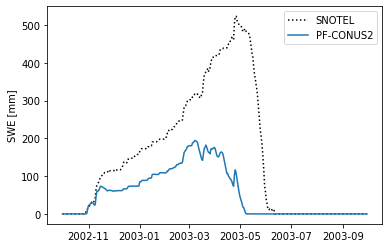

In [56]:
plt.plot(xlength,swe.iloc[0], label = 'SNOTEL', color = 'k',linestyle='dotted')
plt.plot(xlength,swe.iloc[1], label = 'PF-CONUS2')
plt.ylabel('SWE [mm]')
#plt.xlabel('days since start of WY2003')
plt.legend()
plt.savefig('SWE_SNOTEL_PFCONUS2_WY2003_415_CopperMtn.png', dpi = 200)

# Visualize CONUS SWE
just for fun

In [ ]:
swe_day_pfb = np.squeeze(read_pfb(f'{directory_out}/swe_out.2003.daily.200.pfb'))

In [ ]:
swe_day_pfb[swe_day_pfb==-9999]=np.nan

In [ ]:
plt.figure(figsize = (9,7))
plt.imshow(swe_day_pfb, origin="lower", vmax = 1000)
plt.plot(NX,NY, marker='v', color="white", markersize=10)
plt.colorbar()
#plt.title(f'CLM variable {clm_var}, timestep {timestep}')

In [ ]:
swe_day_pfb